### Load data

In [41]:
import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../')))

from lib.data_preparation import DataPreparation
from lib.preprocessing_data import Preprocessing


data_set = DataPreparation().load_data()
data_set = data_set.sample(frac=0.005).reset_index(drop=True)

---
# Bag Of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

import pandas as pd

processed_data = Preprocessing.tokenization(data_set)

text_data = processed_data['processed_tweet'].apply(lambda row: ' '.join(row))

bow_vector = vectorizer.fit_transform(text_data)


transformed_output = vectorizer.transform(text_data)
feature_names = vectorizer.get_feature_names_out()
dense_output = transformed_output.todense()
visulize_bow_vector = pd.DataFrame(
    dense_output, 
    columns=feature_names,
    index=text_data.index 
)


visulize_bow_vector.to_csv('bow_vector.csv', index=False)


In [ ]:

# word_frequencies = {}
# for token_list in tokens:
#     for token in token_list:
#         word_frequencies[token] = word_frequencies.get(token, 0) + 1


# bow_vectors = pd.concat([positive_bow, negative_bow, neutral_bow], axis=0)
# bow_vectors.fillna(0, inplace=True)



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# plt.figure(figsize=(15, 8))
plt.figure(figsize=(15, 8), facecolor='lightgray')
sns.heatmap(bow_vector, cmap="YlGnBu", annot=False, cbar=True)
plt.title("Bag-of-Words Model Heatmap")
plt.xlabel("Features (Words)")
plt.ylabel("Documents")
plt.show()

---
# 0 or 1, if the word exist (Binary/Count Vectorizer)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = CountVectorizer(binary=True)

import pandas as pd

processed_data = Preprocessing.tokenization(data_set)

text_data = processed_data['processed_tweet'].apply(lambda row: ' '.join(row))

binary_vector = vectorizer.fit_transform(text_data)

transformed_output = vectorizer.transform(text_data)
feature_names = vectorizer.get_feature_names_out()
dense_output = transformed_output.todense()
visulize_binary_vector = pd.DataFrame(
    dense_output, 
    columns=feature_names,
    index=text_data.index 
)

visulize_binary_vector


---
# Term Frequency-Inverse Document Frequency (TF-IDF)

In [42]:
vectorizer = TfidfVectorizer()

processed_data = Preprocessing.tokenization(data_set)
text_data = processed_data['processed_tweet'].apply(lambda row: ' '.join(row))

tf_idf_vector = vectorizer.fit_transform(text_data)

transformed_output = vectorizer.transform(text_data)
feature_names = vectorizer.get_feature_names_out()
dense_output = transformed_output.todense()
visulize_tf_idf_vector = pd.DataFrame(
    dense_output, 
    columns=feature_names,
    index=text_data.index 
)



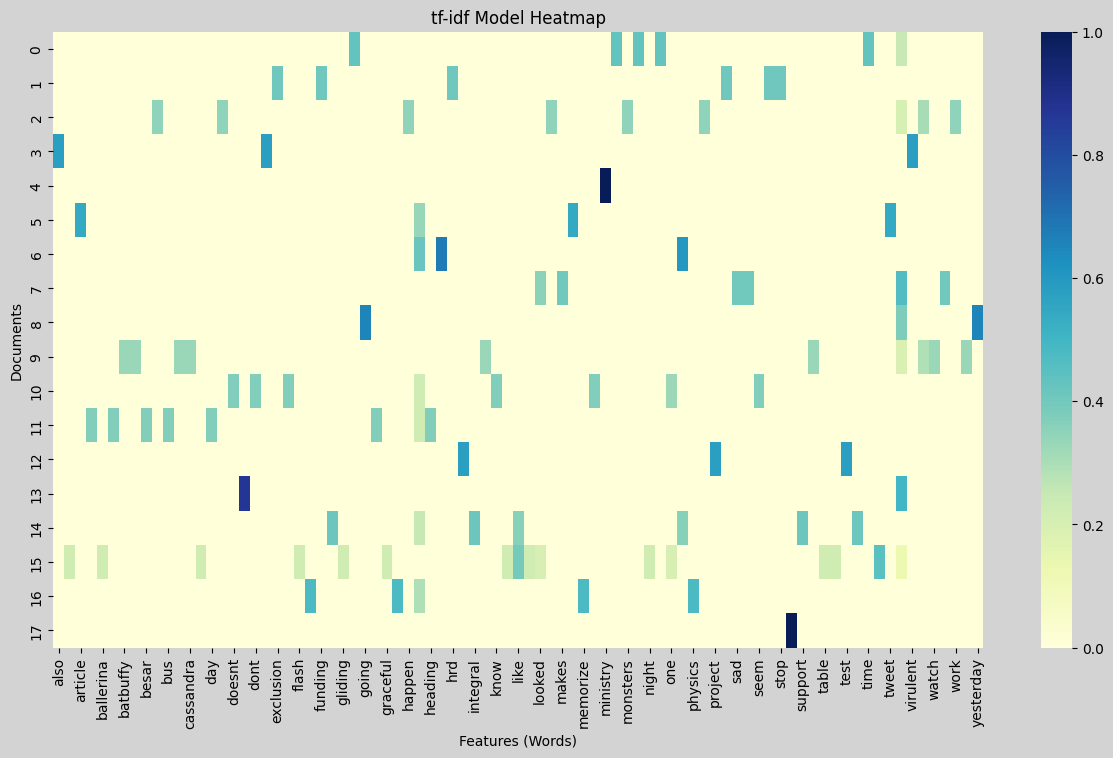

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# plt.figure(figsize=(15, 8))
plt.figure(figsize=(15, 8), facecolor='lightgray')
sns.heatmap(visulize_tf_idf_vector, cmap="YlGnBu", annot=False, cbar=True)
plt.title("tf-idf Model Heatmap")
plt.xlabel("Features (Words)")
plt.ylabel("Documents")
plt.show()